# Best Market to Advertise Our Product

The present goal is to find the best markets to advertise our programming courses so we can get the best best ROI. Ultimately we want to narrow or findings down to the two best markets available for us to spend our advertising dollars.

In [79]:
# set up data science environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Our data comes from "freeCodeCamp" found here: https://github.com/freeCodeCamp/2017-new-coder-survey. 

They conducted a survey on more than 20,000 developers with 136 different variables in order to understand those in the field better.

In [80]:
# load in data
df = pd.read_csv(r"C:\Users\jdgoe\OneDrive\Pictures\Screenshots\D_Viz\2017-fCC-New-Coders-Survey-Data.csv", low_memory=False)
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

This is quite messy, there are so many categories beause each unique combination of role interests is given it's own category. We want to single out the individual roles as categories of interest so we can narrow down the most popular rows more easily.

In [82]:
def transform_roles(in_row):
    role_list = []
    if in_row is not np.nan:
        for each_val in in_row.split(","):
            role_list.append(each_val.replace(r"  "," ").replace("-"," ").strip().lower())
#             role_list.append(each_val.replace("development", "developer"))
        in_row = role_list
    return in_row

df["JobRoleInterest"] = df.JobRoleInterest.apply(transform_roles)

pd.options.display.max_colwidth = 120
# display first 5 records after transformation as sample
print("Sample rows after transformation", "\n")
print(df["JobRoleInterest"].head(), "\n")

pd.options.display.max_colwidth = 50

Sample rows after transformation 

0                                                                                                                    NaN
1                                                                                             [full stack web developer]
2       [front end web developer, back end web developer, devops / sysadmin, mobile developer, full stack web developer]
3                                            [front end web developer, full stack web developer, back end web developer]
4    [full stack web developer, information security, mobile developer, front end web developer, back end web developer]
Name: JobRoleInterest, dtype: object 



In [83]:
roles_dict = {}
for row in df["JobRoleInterest"]:
    if row is not np.nan:
        for each_role in row:
            if each_role in roles_dict:
                roles_dict[each_role] += 1
            else:
                roles_dict[each_role] = 1

TopRoles = pd.DataFrame(roles_dict.items())
TopRoles.rename(columns = {0 : "RoleName", 1: "Count"}, inplace = True)

# Compute contribution of each subject percentage wise
TopRoles["Count%"] = (TopRoles["Count"]/ TopRoles["Count"].sum()).mul(100).round(2)

# Select only the top most sought out courses
TopRoles = TopRoles.sort_values("Count%", ascending = False)[:10]

TopRoles = TopRoles.reset_index()
print(TopRoles)

   index                  RoleName  Count  Count%
0      0  full stack web developer   4198   18.58
1      1   front end web developer   3533   15.63
2      2    back end web developer   2772   12.27
3      4          mobile developer   2305   10.20
4      9            data scientist   1643    7.27
5      7            game developer   1628    7.20
6      8  user experience designer   1469    6.50
7      5      information security   1326    5.87
8     10             data engineer   1248    5.52
9      3         devops / sysadmin    927    4.10


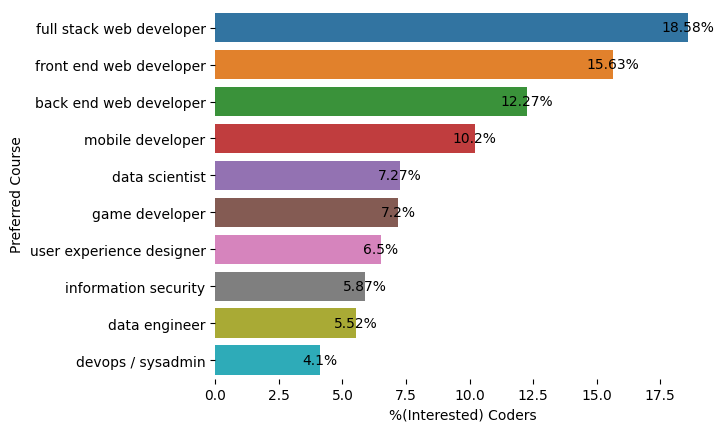

In [84]:
fig = sns.barplot(y = TopRoles.RoleName, x = TopRoles["Count%"])

for index, row in TopRoles.iterrows():
    plt.text(row["Count%"], index, str(row["Count%"]) + '%', ha = 'center', va='center')

# Set the x-axis label
plt.xlabel('%(Interested) Coders')
plt.ylabel('Preferred Course')
sns.despine(top=True, right=True, left=True, bottom=True)

# Show the plot
plt.show()

The top 4 preffered courses include mobile and web development whic is exactly what we are looking for.

## Location Analysis

Two distinct columns in dataset provide information related to a coders geographic location - "Country Citizen" and "Country Live" - coder's native and current residence.

The E-Company is only interested in the current location of the coders. Hence the country a coder is currently living at, can be considered as an individual market.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If the ads manage to convince 10% of the 5000 potential customers in market A to buy E-Company's product, then it is better than convincing 100% of the 30 potential customers in market B.

For the analysis, only those coders have been considered who have answered to the Job Role preference.

In [85]:
df = df.dropna(subset = ['JobRoleInterest'])
country = df["CountryLive"].value_counts(normalize=True).apply(lambda x: round(x * 100, 2)).head(8)

<Axes: >

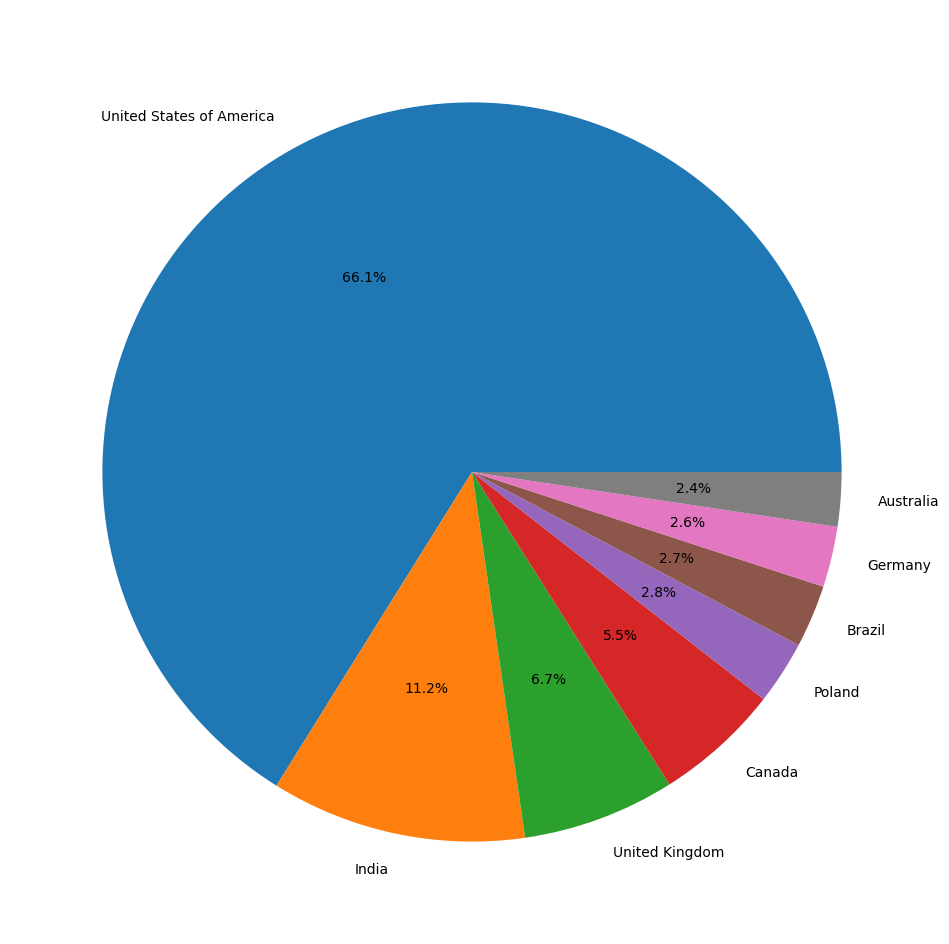

In [86]:
country.plot.pie(figsize=(12,12), autopct='%1.1f%%', label="")

Among all of those that answered a preferred role, a large majority are from the united states, followed by India. UK and Canada also have mentionable representation.

## Investment Potential

We now want to see which countries invest the most per month

In [87]:
# keep only top four countries
df = df[df["CountryLive"].isin(["United States of America", "India", "United Kingdom", "Canada"])]

# drop rows where there is no money for learning
df = df[df['MoneyForLearning'] !=0]
"""
"MonthsProgramming" has been assigned 1 in case the participant has responded with 0 as value
"""
df.loc[df["MonthsProgramming"] == 0, "MonthsProgramming"] = 1

# New column for amount of money spent by coder per month
df["InvestPerMonth"] = df["MoneyForLearning"]/ df["MonthsProgramming"]

"""
Restrict survey data to rows with non-null values for InvestPerMonth
"""
df = df.dropna(subset = ["InvestPerMonth"])

In [88]:
pd.DataFrame(df.groupby("CountryLive").InvestPerMonth.mean().sort_values())

,InvestPerMonth
CountryLive,
United Kingdom,92.730727
Canada,238.970444
India,311.202759
United States of America,413.043929


# Identify extreme outliers
Taking account of few socio-economical metrics like GDP per capita, it would be intuitive to expect people in the UK and Canada to spend more on learning than people in India.

Since the results are otherwise, either there is lack of enough representative data for the three countries or the data has some outliers, or the data could really be correct.

Let's create a violin plot to spot any potential outliers

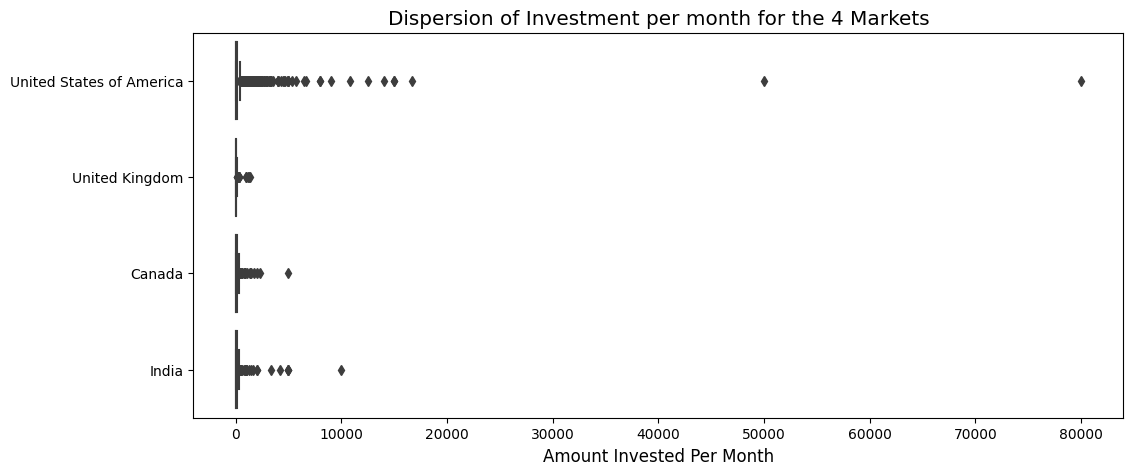

In [89]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 5))
sns.boxplot(ax = ax, y = "CountryLive", data = df, x = "InvestPerMonth")
ax.set_ylabel("") #"Markets", fontsize = "large")
ax.set_xlabel("Amount Invested Per Month", fontsize = "large")
ax.set_title("Dispersion of Investment per month for the 4 Markets", fontsize = "x-large")
plt.show()

USA shows two extremely high value for Investments made per month. Although possible, these values seem unlikely and hence are eliminated outright.

In [90]:
# filter dataframe with Invest Per Month values below 20000 USD
df = df[df.InvestPerMonth < 12000]

<Axes: xlabel='InvestPerMonth', ylabel='CountryLive'>

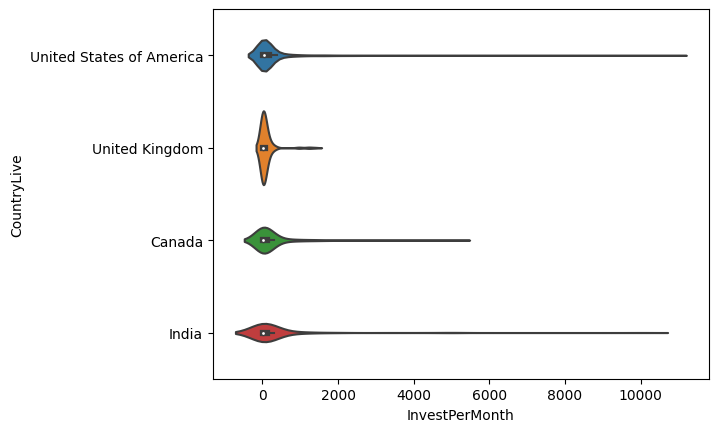

In [91]:
sns.violinplot(data=df, x = 'InvestPerMonth', y = 'CountryLive')

In [92]:
column_stats = df.groupby('CountryLive')['InvestPerMonth'].describe()
print(column_stats)

                           count        mean          std       min  \
CountryLive                                                           
Canada                     114.0  238.970444   617.345854  0.416667   
India                      201.0  311.202759  1026.728280  0.138889   
United Kingdom             137.0   92.730727   222.359671  0.050000   
United States of America  1612.0  288.803632   817.125507  0.033333   

                                25%        50%         75%           max  
CountryLive                                                               
Canada                     8.333333  25.000000  131.250000   5000.000000  
India                      5.500000  20.000000  133.333333  10000.000000  
United Kingdom             8.333333  20.833333   66.666667   1400.000000  
United States of America  10.000000  33.333333  166.666667  10833.333333  


# Country Conclusions

These four Countries are all great candidates. USA seems to be the best by far - they have the best max,Upper quartile,count, and median. While India has a higher average(mean) spending, their median spenders are less than Canada and USA. Yet, their total count number is nearly double Canada. 

## Gender

let's find a gender distribution to figure potential targeting based on that

<Axes: >

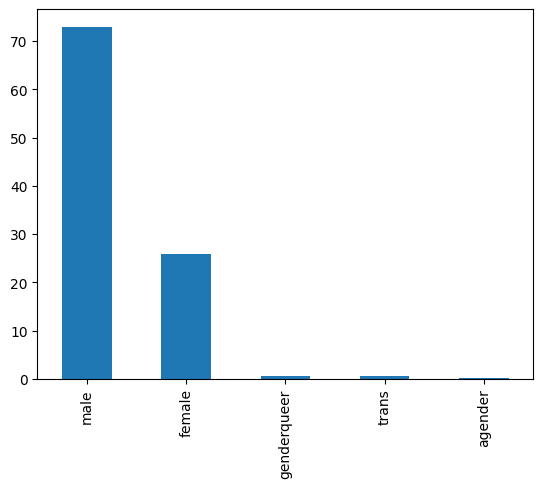

In [94]:
df['Gender'].value_counts(normalize=True).apply(lambda x: round(x * 100, 2)).plot.bar(grid=False)

With ~75% being male, advertising should be targeted accordingly if possible.